#  **Neural Networks Basics**


# 1. Multi-layer Perceptron (MLP)🧠


Multi-Layer Perceptron (MLP) consists of fully connected dense layers that transform input data from one dimension to another. It is called multi-layer because it contains an input layer, one or more hidden layers and an output layer. The purpose of an MLP is to model complex relationships between inputs and outputs.
👉 The purpose of an MLP is to model complex, non-linear relationships between inputs and outputs.

## ⚙️ Components of Multi-Layer Perceptron (MLP)

- **Input Layer**: Each neuron or node in this layer corresponds to an input feature. For instance, if you have three input features the input layer will have three neurons.
  
- **Hidden Layers**: MLP can have any number of hidden layers with each layer containing any number of nodes. These layers process the information received from the input layer.

  
- **Output Layer**: The output layer generates the final prediction or result. If there are multiple outputs, the output layer will have a corresponding number of neurons.

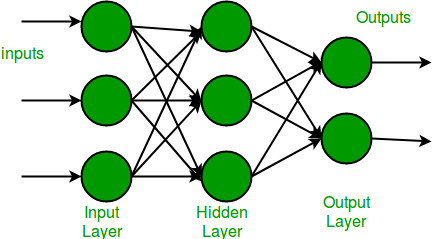

## 🔄 Process:

1. Forward pass: Input flows through layers, transformed at each step.
   
3. Compute loss: Compare predictions with ground truth.

   
5. Backpropagation: Gradients flow backward to update weights, minimizing loss.

## 💻 TensorFlow Implementation:

- You define dense layers (e.g. tf.keras.layers.Dense(...)) with activation (ReLU, sigmoid, etc).
  
- Compile the model with loss, optimizer, then .fit() on training data to train





## 🔓 Multiple hidden layers = can solve non-linear problems.

### 1. **Single-layer perceptron = only linear decision boundaries**

- A single perceptron with a step or linear activation can only separate data with a straight line (or hyperplane).
  
- It fails on tasks like XOR, where data isn’t linearly separable.

### 2. **Non-linear activation is essential**

- Without non-linear activations (e.g. ReLU, sigmoid, tanh), stacking layers is pointless: multiple linear layers collapse into a single linear transformation.
  
- Non-linearity lets the model compose complex mappings.

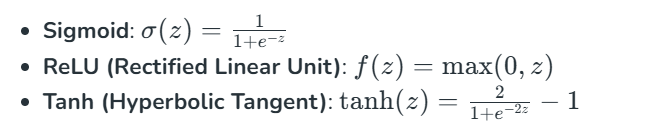

### 3. **Hidden layers build hierarchical feature maps**

- Each hidden layer extracts higher-level representations from the input.
  
- Early layers capture simple patterns; deeper ones capture richer, abstract concepts.

  
- This hierarchical feature building enables modeling of complex decision boundaries like spirals or concentric circle.

### 4. **Universal approximation theorem confirms it**

- A network with either a wide enough single hidden layer or sufficient depth can approximate any continuous function arbitrarily well, given non-linear activations.
  
- Deeper architectures can be more parameter-efficient than extremely wide shallow ones.

  

## 🤯 Why Multiple Hidden Layers Solve Non-Linear Problems

1. **Single-layer = linear only** ➝ Can’t solve XOR or other non-linear problems.
2. **Non-linear activations are essential** ➝ Without them, stacked layers collapse into one linear transformation.
3. **Hierarchical feature learning** ➝ Early layers learn simple patterns, deeper ones capture abstract features.
4. **Universal Approximation Theorem** ➝ With enough depth & non-linear activations, MLPs can approximate any continuous function.

👉 Example: XOR can’t be solved by a single layer, but with two hidden layers + ReLU it becomes solvable.

## 📝 Summary

| Feature | Single-Layer Perceptron | Multi-Layer Perceptron (Deep) |
| --- | --- | --- |
| Activation Functions | Often linear or step | Non-linear (ReLU, sigmoid, tanh) |
| Capability | Only linear separability | Arbitrary (non-linear) surfaces |
| Hidden Layers | 0 or 1 | Many |
| Approximation Power | Very limited | Universal (given enough size/depth) |
- Without hidden layers or with only linear activations → your network can only learn linear mappings.
- With hidden layers + non-linear activations → you can approximate arbitrarily complex, non-linear functions.

## ✅ Advantages of Multi Layer Perceptron

- **Versatility**: MLPs can be applied to a variety of problems, both classification and regression.
  
- **Non-linearity**: Using activation functions MLPs can model complex, non-linear relationships in data.

  
- **Parallel Computation**: With the help of GPUs, MLPs can be trained quickly by taking advantage of parallel computing.

## ⚠️ Disadvantages of Multi Layer Perceptron

- **Computationally Expensive**: MLPs can be slow to train especially on large datasets with many layers.
  
- **Prone to Overfitting**: Without proper regularization techniques they can overfit the training data, leading to poor generalization.

  
- **Sensitivity to Data Scaling**: They require properly normalized or scaled data for optimal performance.

- **Black-box Nature**: Hard to interpret learned features.


In [1]:
import numpy as np
import tensorflow as tf

# XOR dataset
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=np.float32)

y_train = np.array([
    [0],
    [1],
    [1],
    [0]
], dtype=np.float32)

# Define model with multiple hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),  # First hidden layer
    tf.keras.layers.Dense(8, activation='relu'),                     # Second hidden layer
    tf.keras.layers.Dense(4, activation='relu'),                     # Third hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')                   # Output layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=500, verbose=0)

# Evaluate
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Training accuracy: {acc:.2f}")

# Predictions
print("Predictions:")
print(model.predict(X_train))


C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training accuracy: 1.00
Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
[[0.04394526]
 [0.9882844 ]
 [0.98025495]
 [0.0105371 ]]


## Explanation

### 🔎 What this does

- 3 hidden layers (16 → 8 → 4 neurons, ReLU).

- Trains longer (epochs=500) to ensure convergence.

- Output layer with sigmoid → gives probability between 0 and 1.

- Model should classify XOR perfectly (accuracy ≈ 1.00).

👉 With one hidden layer, XOR is solvable but might need enough neurons.
👉 With multiple hidden layers, the network can learn hierarchical features (like “is input different?”) and approximate the XOR mapping more smoothly.

### 🔑 Insight

- A single-layer perceptron can’t solve XOR → it only draws a straight line, but XOR needs a “checkerboard-like” split.
- With multiple hidden layers + ReLU you gave the model enough capacity to learn non-linear boundaries.
- The hidden layers essentially learned a function like:
    - detect when inputs differ vs. when they’re the same,
    - combine that info,
    - output the correct XOR label.

---

## Hands-On
- Build a 2–3 layer MLP in PyTorch/TensorFlow.
- Train on MNIST dataset.
- Compare accuracy with/without activation functions.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


## Explanation:

- tensorflow → main library for building and training neural networks.

- numpy → for numerical operations, like arrays and matrix manipulations.

- matplotlib.pyplot → for plotting graphs and visualizing data.

- Sequential → allows stacking layers one after another (simplest way to define a model).

- Flatten, Dense → types of layers:

    - Flatten → converts 2D images (28×28) into 1D array for the network.

    - Dense → fully connected layer (each neuron connected to all previous neurons)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


- MNIST is a dataset of 28×28 grayscale images of handwritten digits (0–9).

- x_train → training images

- y_train → training labels (digit values)

- x_test → testing images

- y_test → testing labels

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


- Pixel values are from 0 to 255 → divide by 255 to scale between 0–1.

- Normalization helps the model train faster and converge better.

In [5]:
print("Training features:", x_train.shape)
print("Training labels:", y_train.shape)
print("Testing features:", x_test.shape)
print("Testing labels:", y_test.shape)


Training features: (60000, 28, 28)
Training labels: (60000,)
Testing features: (10000, 28, 28)
Testing labels: (10000,)


- Check the size of the dataset to confirm it loaded correctly.

- Output should be:

    - x_train: (60000, 28, 28) → 60k images of 28×28

    - y_train: (60000,) → 60k labels

    - x_test: (10000, 28, 28) → 10k test images

    - y_test: (10000,) → 10k test labels

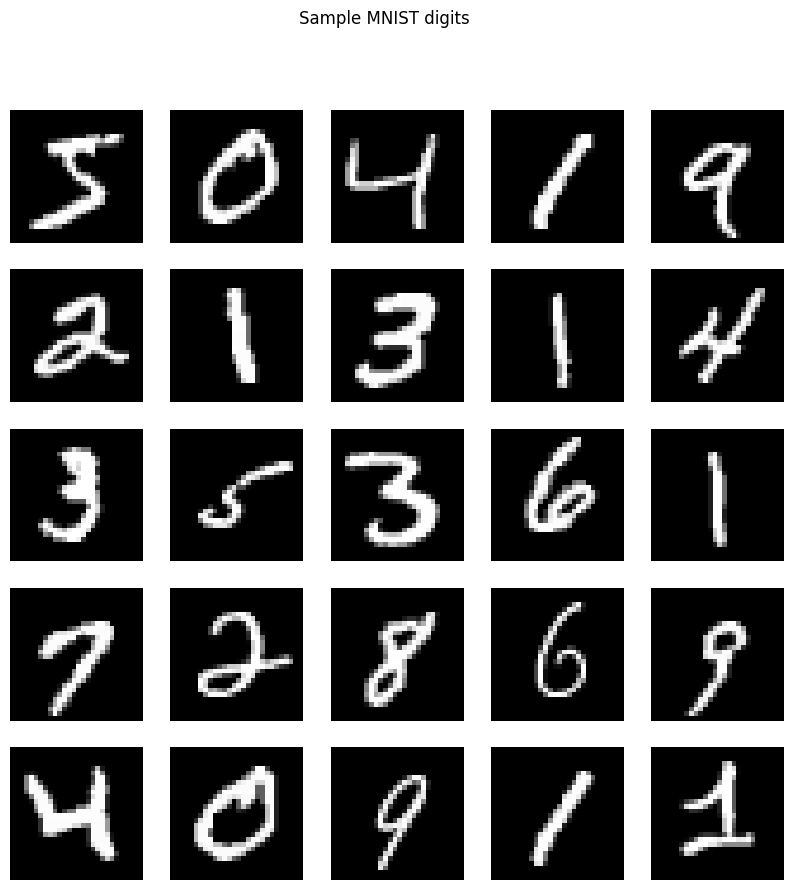

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Sample MNIST digits")
plt.show()


- Shows 25 sample images from the training dataset.

- Helps beginners see the data the model will learn from.

- cmap='gray' → display images in grayscale.

In [7]:
def build_model(use_activation=True):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    if use_activation:
        model.add(Dense(256, activation='relu'))
        model.add(Dense(128, activation='relu'))
    else:
        model.add(Dense(256))  
        model.add(Dense(128))  
    
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


- Flatten(input_shape=(28,28)) → converts images to 784-dimensional vectors.
- Hidden layers:
    - 256 neurons → ReLU
    - 128 neurons → ReLU
    - **Optional:** if use_activation=False, layers are linear (no non-linearity).
- Output layer:
    - 10 neurons → softmax → outputs probabilities for each digit class.
- Compile:
    - optimizer='adam' → adaptive learning rate optimizer
    - loss='sparse_categorical_crossentropy' → good for integer labels
    - metrics=['accuracy'] → track accuracy during training

In [8]:
model_with_relu = build_model(use_activation=True)
history_with_relu = model_with_relu.fit(
    x_train, y_train,
    epochs=10,
    batch_size=2000,
    validation_split=0.2,
    verbose=1
)


C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7427 - loss: 1.0125 - val_accuracy: 0.8998 - val_loss: 0.3534
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9108 - loss: 0.3112 - val_accuracy: 0.9318 - val_loss: 0.2422
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9348 - loss: 0.2293 - val_accuracy: 0.9439 - val_loss: 0.2008
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9469 - loss: 0.1868 - val_accuracy: 0.9513 - val_loss: 0.1722
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9555 - loss: 0.1560 - val_accuracy: 0.9554 - val_loss: 0.1533
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9616 - loss: 0.1345 - val_accuracy: 0.9603 - val_loss: 0.1370
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9671 - loss: 0.1159 - val_accuracy: 0.9639 - val_loss: 0.1278
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9717 - loss: 0.1000 - val_accuracy: 0.9653 - v

- Trains the model with ReLU activation.

- epochs=10 → entire dataset is passed 10 times.

- batch_size=2000 → 2000 images processed at a time.

- validation_split=0.2 → 20% of training data is used for validation.

- history_with_relu stores training metrics (accuracy, loss) for plotting later.

In [9]:
model_without_relu = build_model(use_activation=False)
history_without_relu = model_without_relu.fit(
    x_train, y_train,
    epochs=10,
    batch_size=2000,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.7448 - loss: 0.8557 - val_accuracy: 0.8916 - val_loss: 0.3805
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8930 - loss: 0.3640 - val_accuracy: 0.9114 - val_loss: 0.3104
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9101 - loss: 0.3132 - val_accuracy: 0.9196 - val_loss: 0.2910
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9169 - loss: 0.2959 - val_accuracy: 0.9210 - val_loss: 0.2792
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9197 - loss: 0.2841 - val_accuracy: 0.9228 - val_loss: 0.2743
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9220 - loss: 0.2761 - val_accuracy: 0.9254 - val_loss: 0.2705
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9239 - loss: 0.2697 - val_accuracy: 0.9267 - val_loss: 0.2677
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9250 - loss: 0.2659 - val_accuracy: 0.9273 - v

- Same as above but no activation in hidden layers (pure linear).

- Shows why ReLU is important: linear model cannot learn complex patterns in MNIST.

In [10]:
loss_acc_with = model_with_relu.evaluate(x_test, y_test, verbose=0)
loss_acc_without = model_without_relu.evaluate(x_test, y_test, verbose=0)

print("\nWith ReLU -> Test loss: {:.4f}, Test accuracy: {:.4f}".format(*loss_acc_with))
print("Without ReLU -> Test loss: {:.4f}, Test accuracy: {:.4f}".format(*loss_acc_without))



With ReLU -> Test loss: 0.0986, Test accuracy: 0.9708
Without ReLU -> Test loss: 0.2710, Test accuracy: 0.9255


- Evaluates how well models perform on unseen test data.

- loss → how wrong the model is.

- accuracy → how many predictions are correct.

- You will see with ReLU has much higher accuracy than without ReLU.

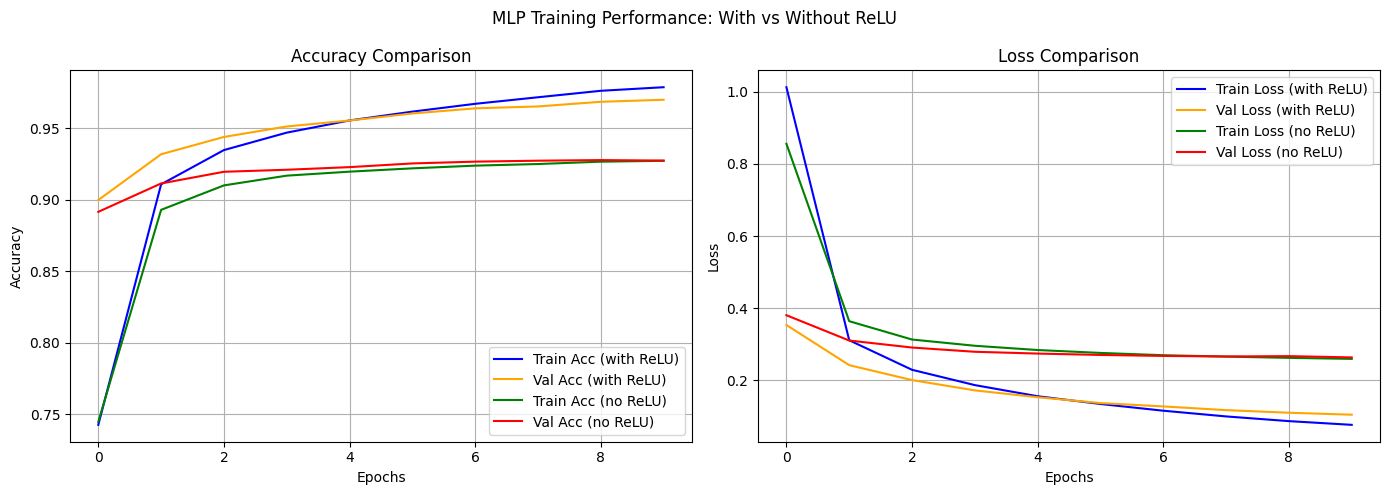

In [11]:
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_with_relu.history['accuracy'], label='Train Acc (with ReLU)', color='blue')
plt.plot(history_with_relu.history['val_accuracy'], label='Val Acc (with ReLU)', color='orange')
plt.plot(history_without_relu.history['accuracy'], label='Train Acc (no ReLU)', color='green')
plt.plot(history_without_relu.history['val_accuracy'], label='Val Acc (no ReLU)', color='red')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_with_relu.history['loss'], label='Train Loss (with ReLU)', color='blue')
plt.plot(history_with_relu.history['val_loss'], label='Val Loss (with ReLU)', color='orange')
plt.plot(history_without_relu.history['loss'], label='Train Loss (no ReLU)', color='green')
plt.plot(history_without_relu.history['val_loss'], label='Val Loss (no ReLU)', color='red')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.suptitle("MLP Training Performance: With vs Without ReLU")
plt.tight_layout()
plt.show()


## **Explanation:**

- Plots accuracy and loss for both models.
  
- Blue/Orange → model with ReLU

  
- Green/Red → model without ReLU

  
- Helps visualize the benefit of ReLU:
    - Accuracy rises faster with ReLU.
    - Loss drops lower with ReLU.
    - Without ReLU → struggles to learn, poor accuracy.


## 💡 **Big Takeaway:**

- ReLU in hidden layers → critical for learning nonlinear patterns.
  
- Linear layers without activation → model collapses to a linear function → cannot solve MNIST well.

  
- Softmax in the output → converts logits to probabilities, necessary for multi-class classification.

# 2. Forward pass


The forward pass is the first step in both training and running a neural network. During this stage, the input data moves through the network layer by layer until it generates an output. To make this easier to understand, we’ll look at a simple 3–2–1 architecture: a network with three input neurons, two hidden neurons, and one output neuron. This setup provides a clear way to walk through each step of the process.

### **Step 1: Input Layer** 📝

The input layer is usually considered as layer 0, these are the features used in predicting our target variable.

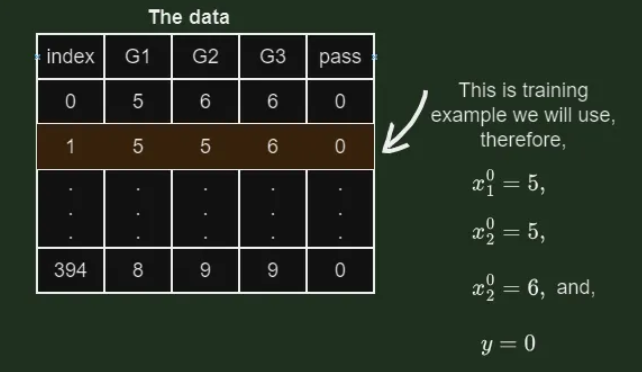

Let’s look more closely at the math that happens before the data enters the first hidden layer. Each input feature is multiplied by its associated weight, and all these weighted values are added together. On top of that, a bias term is included to adjust and fine-tune the result.

The formula used is:

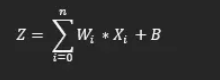

where:

- W represents the weight assigned to each input feature,
- X is the input feature itself, and
- B is the bias term.

This calculation produces an initial value, Z which is then passed through an activation function in the hidden layer.

So to begin let us set the initial weights, the values will be set between 0–1 while the bias will be set to 0.

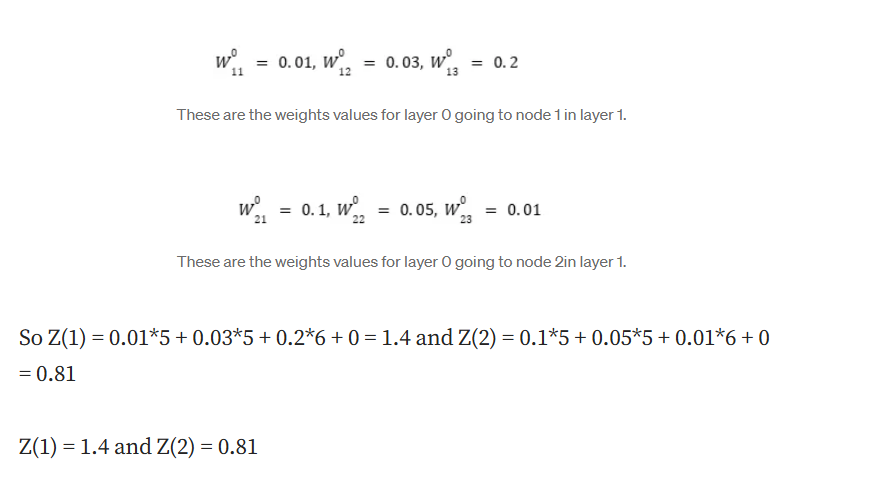

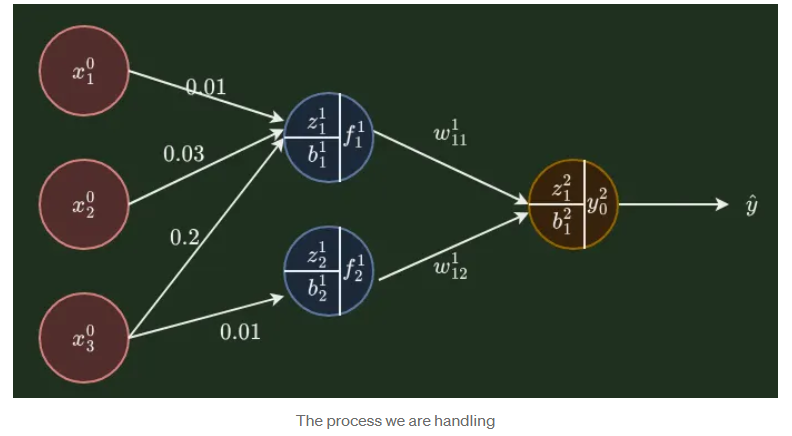

### **Step 2: Hidden Layers** 🔀

Once the input values reach the hidden layer, each neuron computes a weighted sum of its inputs, adds a bias, and then applies an activation function. Common choices include ReLU or sigmoid, which decide whether the neuron activates or not. The activation function is what brings non-linearity into the network, enabling it to capture complex patterns.

In our example, this happens in the second layer (layer 1). While neural networks can have multiple hidden layers, we’re keeping it simple here. The key operation is straightforward: take the calculated value Z and feed it into an activation function. Since we’re dealing with a binary classification problem, we’ll be using the sigmoid function.

A little intro on the sigmoid function:

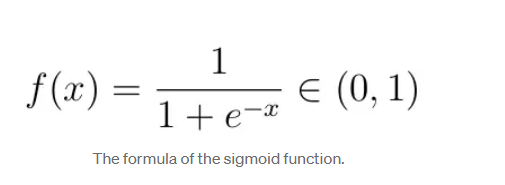

The sigmoid function produces outputs of probabilities hence the choice. So any output of a probability above 0.5 is a 1 while below 0.5 is considered as a 0.

Now we apply it in our example.

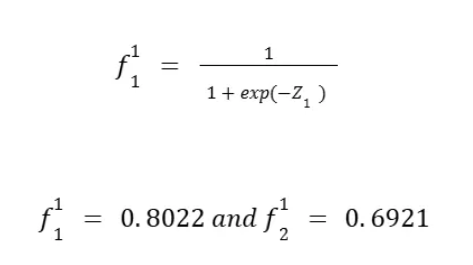

Now after applying the activation function we now introduce the new weights and repeat the same process in step 1. Note that we are selecting weights within 0–1 while all the bias are set to 0.

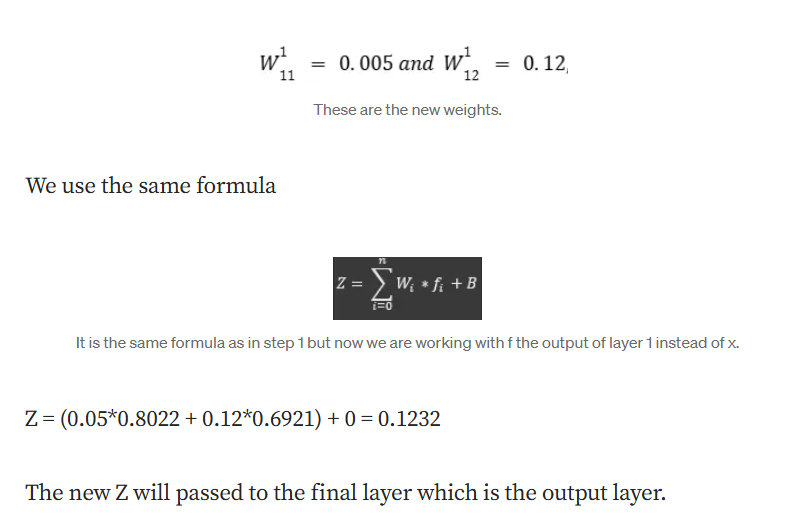

### **Step 3: Output Layer** 🎯

The last stage of the forward pass is the output layer, where the network produces its predictions. In a binary classification problem, this layer typically has a single neuron that outputs a probability. For multi-class problems, there’s usually one neuron per class, each representing the likelihood of that class. The outputs are often passed through a function—like softmax for multi-class or sigmoid for binary—to convert them into probabilities.

Since our example is a binary classification problem, we’ll use the sigmoid function in the output layer.

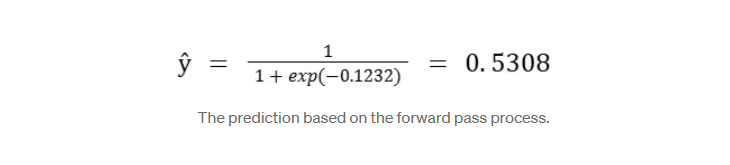

The model prediction was 0.5308 which we round of 1 we see that the model did get the prediction correctly since the true value of y was 0. But note that this is not the final prediction the model then learns using backpropergation which we will cover later.


## **Summary**  📌

In short, the forward pass is the process of taking input data, passing it through all layers of the network, and generating an output. At each layer, the network modifies the data by applying weights, adding biases, and using activation functions, enabling it to capture complex patterns. This step is essential because it sets up the calculation of error, which is then used to improve the network through backpropagation.

This core mechanism allows a neural network to learn over time by continually adjusting its weights and biases to reduce error and make more accurate predictions—a topic we’ll dive into in the next sections.


## Input → Linear transform → Non-linearity → Next layer🔄
    
The process Input → Linear transform → Non-linearity → Next layer describes a fundamental step in a neural network, detailing what happens inside a single neuron or layer as it processes information. This sequence, known as the "forward pass," enables the network to learn complex, non-linear relationships in data.


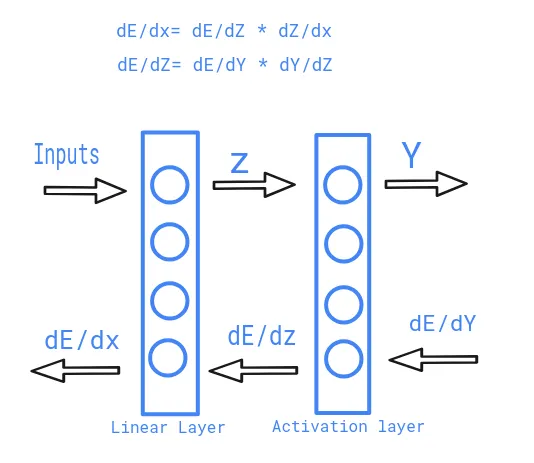

### 1. Input 📝

The forward pass begins with an input, which can either be the raw data (e.g., pixel values of an image) or the output from the previous layer in a multi-layer network.

### 2. Linear Transformation ➕

Each neuron computes a weighted sum of its inputs and adds a bias term. This linear operation can be expressed as:

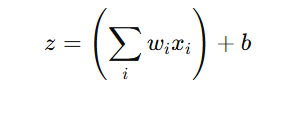

Where:

- xi represents the inputs.
- wi represents the weights, which determine the strength of each connection and are updated during training.
- b is the bias term, allowing the neuron to shift the output for better data fitting.
- z is the result of this linear transformation.

### 3. Non-Linearity 🔀

The output of the linear transformation (z) is passed through a non-linear activation function (e.g., ReLU, Sigmoid, or Tanh). This step is essential because:

- **Enables learning complex patterns**: Without non-linearity, the network would behave like a single linear model regardless of its depth. Non-linear activations allow it to capture complex, non-linear relationships in the data.
- **Prevents layer collapse**: Composing multiple linear functions is still linear. A non-linear activation ensures the network maintains its depth and representational power.

### 4. Next Layer ⏭️

The output of the activation function becomes the input for the next layer. This process repeats through all hidden layers until the output layer is reached, where the network generates its final prediction.

---

In [12]:
import numpy as np

# --- Activation functions ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# --- Input data (example) ---
X = np.array([0.5, 0.3, 0.2])  # 3 features
# Initial weights
W1 = np.random.rand(3, 2)      # weights from input to hidden (3x2)
b1 = np.zeros(2)               # bias for hidden layer (2 neurons)

W2 = np.random.rand(2, 1)      # weights from hidden to output (2x1)
b2 = np.zeros(1)               # bias for output layer (1 neuron)

# --- Forward Pass ---
# Step 1: Hidden layer
Z1 = np.dot(X, W1) + b1        # Linear transform
A1 = sigmoid(Z1)               # Activation function
print("Hidden layer output (A1):", A1)

# Step 2: Output layer
Z2 = np.dot(A1, W2) + b2       # Linear transform
A2 = sigmoid(Z2)               # Activation function
print("Output layer prediction (A2):", A2)

# Binary prediction
prediction = 1 if A2 > 0.5 else 0
print("Predicted class:", prediction)


Hidden layer output (A1): [0.61263102 0.64620959]
Output layer prediction (A2): [0.56344336]
Predicted class: 1


## Explanation

1. Input Layer:
    - X is your input vector.
      
    - No computation happens here; it just feeds into the hidden layer.
  
      
2. Linear Transformation:
    - Z1 = np.dot(X, W1) + b1 computes the weighted sum of inputs plus bias for the hidden layer.
      
    - Z2 = np.dot(A1, W2) + b2 does the same for the output layer.
  
      
3. Non-linearity (Activation):
    - A1 = sigmoid(Z1) applies the activation function to the hidden layer outputs.
      
    - A2 = sigmoid(Z2) applies it to the output layer, giving a probability.
  
      
4. Next Layer:
    - The hidden layer output A1 is used as input for the output layer.
      
5. Output:
    - A2 is the final prediction probability.
      
    - The final binary class prediction is computed using a threshold (0.5).

⚡ Important: This is just the forward pass. There’s no backpropagation or weight updating here it only calculates outputs based on the current weights and biases, which is exactly what a forward pass does.

---

# 3. Loss functions (more detail):

A loss function, also known as a cost function or error function, is a mathematical function that quantifies the discrepancy between a model's predicted outputs and the actual target values. Its primary purpose in machine learning is to guide the optimization process during model training, indicating how well or poorly the model is performing. The goal is to minimize this loss, thereby improving the model's accuracy. 

## ⚙️ How Do Loss Functions Work?

During training, a model makes predictions on a batch of sample data points. The loss function then calculates the error for each example. This error is averaged across the batch and used to update the model's parameters, typically through optimization algorithms like gradient descent. The goal is to minimize this loss, leading to better model performance.


## 🔍 Loss Functions in Supervised Learning

Loss functions are integral to supervised learning, where models are trained on labeled datasets. These functions measure the error between predicted and actual values, guiding the model to learn from its mistakes. For instance, in image segmentation tasks, each pixel is annotated, and the model learns to predict these labels accurately.


## 🧮 Types of Loss Functions

### 1. Regression Loss Functions

Used for predicting continuous values. Common examples include:

- **Mean Squared Error (MSE):** Measures the average of the squares of the errors—i.e., the average squared difference between the estimated values and the actual value.

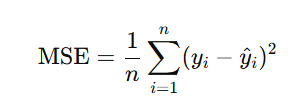

- **Mean Absolute Error (MAE):** Measures the average of the absolute errors between predicted and actual values.
  
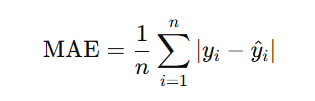

These functions help in tasks like predicting house prices or stock market trends.


### 2. Classification Loss Functions

Used for predicting discrete labels. Examples include:

- **Binary Cross-Entropy (Log Loss):** For binary classification. Measures the difference between actual labels (0/1) and predicted probabilities. Used in logistic regression and binary neural networks.

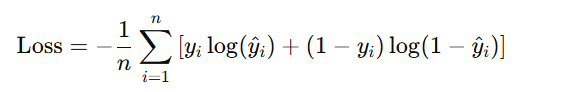

- **Categorical Cross-Entropy:**  For multi-class classification.𝑦𝑖 is one-hot encoded. Common in image classification (e.g., classifying digits 0–9).

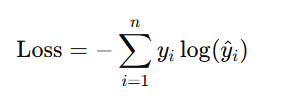

- **Hinge Loss:** Used for binary classification tasks, especially with Support Vector Machines.

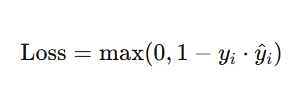

### 3 . Special Loss Functions

- KL Divergence: Measures difference between two probability distributions. Used in probabilistic models.

- Custom Loss Functions: For domain-specific tasks like segmentation or ranking.


## 🛠️ Loss Functions and Model Optimization

Loss functions are not just evaluation metrics; they play a crucial role in optimizing the model. Optimization algorithms, such as gradient descent, use the gradient (derivative) of the loss function to adjust the model's parameters. This iterative process continues until the loss is minimized, indicating the model's parameters are well-tuned.


## 🧠 Loss Functions in Deep Learning

Deep learning models, comprising multiple layers of neurons, utilize loss functions to guide the training process. After a forward pass (making predictions), the loss function calculates the error. During backpropagation, this error is propagated backward through the network to update the weights, refining the model's predictions.


## 🧪 Choosing the Right Loss Function

Selecting an appropriate loss function depends on the specific task:

- For **regression tasks**, MSE or MAE might be suitable.
  
- For **binary classification**, binary cross-entropy is commonly used.

  
- For **multi-class classification**, categorical cross-entropy is preferred.

Understanding the nature of your problem and the type of output your model generates will guide you in choosing the right loss function.



## **Properties of a Good Loss Function**

1. **Differentiable:** Allows gradient-based optimization.
   
3. **Sensitive to Errors:** Larger errors should give higher loss.

   
5. **Appropriate to Task:** Regression vs classification, binary vs multi-class.

## 🔄 Summary

Loss functions are pivotal in training machine learning models. They provide a quantitative measure of a model's performance, guiding the optimization process to improve accuracy. By selecting the appropriate loss function and understanding its role, you can enhance your model's ability to make accurate predictions.

---

## 📊🤖**Cross-entropy for classification** 
    
In classification problems, a machine learning model predicts the probability of each class for any given input. Because each data point truly belongs to only one class (probability 1 for one class, 0 for others). Cross-entropy loss is a way to measure how close a model’s predictions are to the correct answers in classification problems.
    
It helps train models to make more confident and accurate predictions by rewarding correct answers and penalizing wrong ones. This makes it a key part of building reliable machine learning classifiers.
    
Cross-entropy measures the difference between two probability distributions:
    
1. The true distribution (ground truth labels)
   
2. The predicted distribution (model outputs, usually probabilities)
    
It’s widely used in classification tasks because it penalizes predictions that are confident but wrong, which helps models learn faster and more accurately.
    
## 🧠 **Types of Cross-Entropy Loss Function**

### 1. Binary Cross Entropy Loss ⚡

Binary Cross Entropy Loss is a widely used loss function in binary classification problems. For a dataset with N instances, the Binary Cross-Entropy Loss is calculated as:

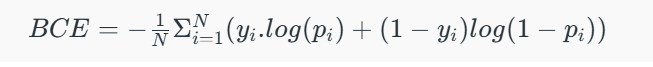

**Explanation:**

- If the true label yi = 1 and y^i  is close to 1 → loss is small ✅
- If the true label yi = 1y_i = 1yi=1 and y^i is close to 0 → loss is large ❌

This makes the model heavily penalize wrong confident predictions, which helps it learn faster.

In [13]:
import numpy as np

# True labels (binary)
y_true = np.array([1, 0, 1, 0])

# Predicted probabilities
y_pred = np.array([0.9, 0.2, 0.8, 0.1])

# Binary Cross-Entropy Loss
loss = -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
print("Binary Cross-Entropy Loss:", loss)


Binary Cross-Entropy Loss: 0.16425203348601802


### **2. Multiclass Cross Entropy Loss** 📊

Multiclass Cross-Entropy Loss, also known as categorical cross entropy or softmax loss is a widely used loss function for training models in multiclass classification problems. For a dataset with N instances, Multiclass Cross-Entropy Loss is calculated as:

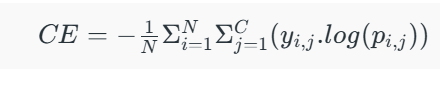

where

- N is number of samples,
  
- C is the number of classes.

  
- yij is 1 if class j is correct for sample i, 0 otherwise.

  
- pij is model-predicted probability of sample i being in class j.

  

In [14]:
import numpy as np

# True labels (one-hot encoded)
y_true = np.array([[1,0,0], [0,1,0], [0,0,1]])

# Predicted probabilities
y_pred = np.array([[0.7,0.2,0.1],
                   [0.1,0.8,0.1],
                   [0.2,0.3,0.5]])

# Categorical Cross-Entropy Loss
loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
print("Categorical Cross-Entropy Loss:", loss)


Categorical Cross-Entropy Loss: 0.4243218919376292


## 💪📊 **Why Cross-Entropy Is Powerful** 

1. Probability-focused: Works directly with predicted probabilities, unlike MSE.
   
3. Penalizes confident mistakes heavily: Encourages better learning.

   
5. Smooth gradients: Perfect for gradient descent in deep learning.

   
7. Works with softmax output: Common in multi-class problems.


# 🧠 Key features of Cross Entropy loss

- **Probabilistic Interpretation:** Guides models to output probabilities near the true class labels.
  
- **Differentiable:** Supports optimization via gradient descent.

  
- **Standard for Neural Networks:** Especially with softmax (multiclass) or sigmoid (binary) output layers.

  
- **Strong Penalization:** Assigns high penalty to confident but wrong predictions.

  
- **Library Support:** Implemented in all major ML libraries like PyTorch, TensorFlow, scikit-learn, etc.


## ⚔️ Comparison: Hinge Loss vs Cross-Entropy Loss

| Feature | **Hinge Loss** | **Cross-Entropy Loss** |
| --- | --- | --- |
| **Used In** | Mainly in Support Vector Machines (SVM) | Mostly in classification tasks with neural networks |
| **Output Requirement** | Works with labels as -1 and +1 | Works with labels as probabilities (0 or 1 for binary classification) |
| **Formula (Binary)** | max (0, 1 - y .f(x)) | -y. log(p) - (1 - y) . log(1 - p) |
| **Penalty Type** | Penalizes wrong classifications with a margin | Penalizes based on probability difference |
| **Prediction Type** | Margin-based classification | Probability-based classification |
| **Smoothness** | Not differentiable at the margin | Smooth and fully differentiable |
| **Better For** | Situations where a large margin is important | Tasks where confidence in predictions matters |
| **Loss Value Behavior** | Becomes 0 when prediction is beyond the margin | Always greater than 0 unless the prediction is perfect |

---

## MSE for regression 📉🤖


### **1. Definition**

**Mean Squared Error (MSE)** is a loss function used in regression tasks to measure how close the predicted values (y^) are to the actual target values (y).

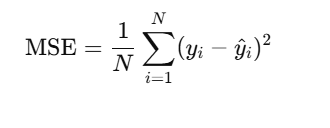

Where:

- N = number of data points
- y_i = true value for sample i
- y^_i = predicted value for sample i

> Intuition: MSE calculates the average of squared differences between predicted and actual values. Squaring ensures that negative and positive errors do not cancel out, and larger errors are penalized more heavily.
>

### **2. Components of MSE 🔍**

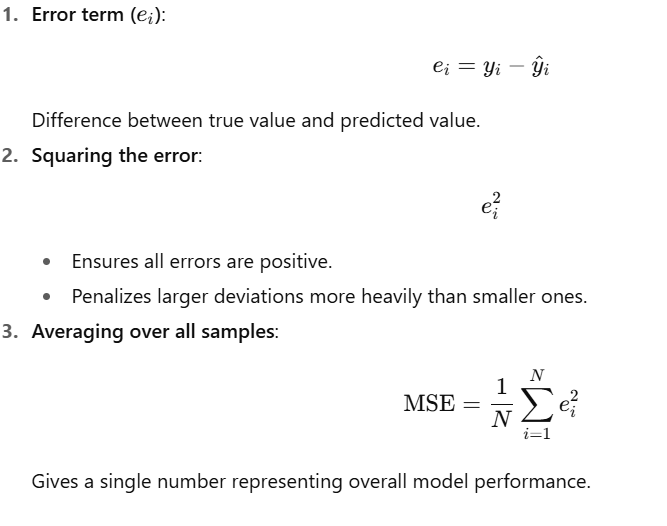

### **3. Advantages of MSE** ✅

- Penalizes large errors strongly : Encourages the model to avoid big mistakes.
- Smooth and differentiable : Perfect for optimization using gradient descent.
- Simple and widely used : Standard loss function for regression, easy to implement.
- Mathematically convenient : Works well with linear regression and many ML models.
- Supports vectorized computation : Efficient in libraries like NumPy, TensorFlow, PyTorch.


### **4. Disadvantages of MSE** ❌

- Sensitive to outliers : Squaring large errors can dominate the loss and skew model training.
- Not in original units : The result is squared, so it can be harder to interpret compared to the target variable’s units. (Use RMSE to fix this.)
- May over-penalize: Can lead to models focusing too much on extreme errors rather than general performance.


### **5. When to Use MSE** 🧩

- Regression tasks where large errors should be penalized heavily.
- Models like linear regression, neural networks for regression, decision tree regression, and gradient boosting regression.
- When smooth gradient is important for optimization.

In [15]:
import numpy as np

# True values
y_true = np.array([3.0, -0.5, 2.0, 7.0])

# Predicted values
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

# Calculate MSE
mse = np.mean((y_true - y_pred) ** 2)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.375


## Explanation

- import numpy as np → Imports NumPy for array and mathematical operations.

- y_true → Array of actual target values.

- y_pred → Array of predicted values from the model.

- y_true - y_pred → Calculates the error for each data point.

- (y_true - y_pred) ** 2 → Squares each error, penalizing larger mistakes.

- np.mean(...) → Computes the average of squared errors → Mean Squared Error (MSE).

- print() → Displays the final MSE; lower values mean better predictions.

### 6.**Variants / Related Metrics 🔗**

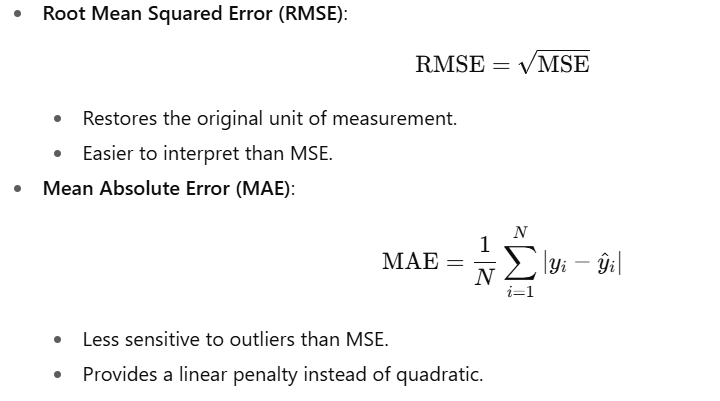

### 7. Key Takeaways 🎯

- MSE is the default choice for regression loss functions.

- It provides a smooth, differentiable loss suitable for gradient-based optimization.

- Large errors are penalized heavily, but it’s sensitive to outliers.

- For interpretability, RMSE is often preferred.

- Works best when the target values are continuous and normally distributed.

---

# **4. Optimizers**


Optimizers are algorithms that adjust the parameters (weights and biases) of a neural network during training to minimize a loss function. The loss function measures the difference between the model’s predictions and the true target values. Optimizers are crucial because they guide the network to learn from data efficiently and make accurate predictions.



## **1. Key Concepts** 🧠

### **Loss Function**

- A mathematical function that quantifies the error or discrepancy between the model's predictions and actual target values.
  
- Guides the optimizer on how to adjust parameters to reduce error.

### **Gradient**

- The partial derivative of the loss function with respect to each parameter.
  
- Indicates the direction and magnitude of the steepest ascent.

  
- Optimizers typically move in the opposite direction of the gradient to minimize the loss.

### **Learning Rate (η)**

- A hyperparameter controlling the step size for parameter updates.
  
- **High learning rate** → larger updates, faster learning, but risk of overshooting minima.

  
- **Low learning rate** → smaller, precise updates, but slower convergence.


## **2. Common Types of Optimizers** 🔄

### **2.1 Gradient Descent (GD)**

- The classic optimization algorithm.
  
- Computes gradients using the entire training dataset.

  
- Updates parameters in the opposite direction of the gradient.

  
- **Pros:** Stable and consistent updates.

  
- **Cons:** Computationally expensive for large datasets.

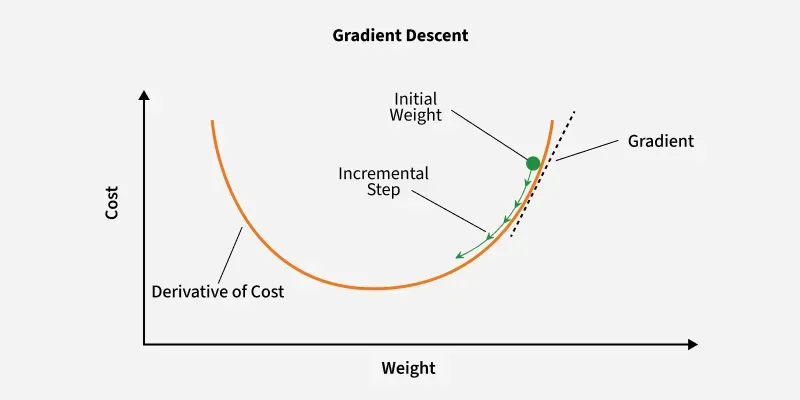

### **2.2 Stochastic Gradient Descent (SGD)** 🟢

- Computes gradient and updates parameters using one or a small batch of examples.
  
- **Pros:** Faster updates, good for large datasets.

  
- **Cons:** Noisy updates can cause oscillations.

  
- **Simple but can be slow** because of noisy convergence.

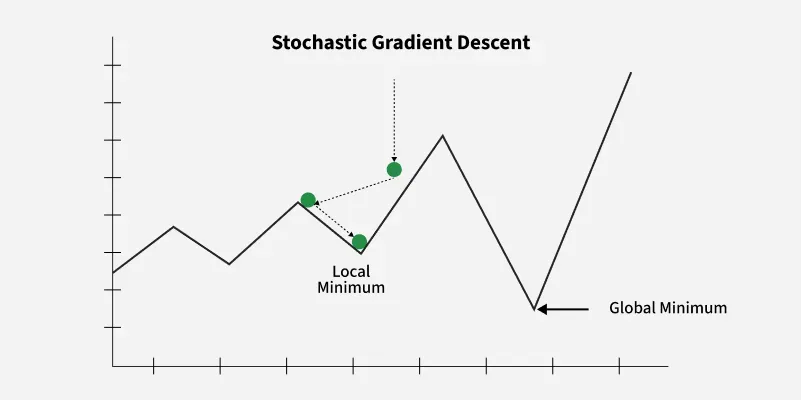

### **2.3 Momentum** 🌀

- Adds a momentum term (velocity) to parameter updates.
  
- Helps accelerate convergence in the right direction.

  
- Reduces oscillations in the update path.

  
- **Pros:** Helps escape shallow local minima, smoother updates.

  
- **Analogy:** Like a ball rolling down a hill — it gains velocity and continues in the right direction.


### **2.4 Adaptive Learning Rate Optimizers** ⚡

These optimizers adjust learning rates dynamically for each parameter based on past gradients.

### **Adagrad**

- Adapts the learning rate based on sum of squared past gradients.
  
- **Pros:** Good for sparse data.

  
- **Cons:** Learning rate can shrink too much over time.

### **RMSprop**

- Similar to Adagrad but uses a moving average of squared gradients.
  
- Solves Adagrad’s issue of diminishing learning rates.

### **Adam (Adaptive Moment Estimation)** 🚀

- Combines Momentum + RMSprop.
  
- Maintains exponentially decaying averages of past gradients and squared gradients.

  
- **Pros:** Efficient, robust, widely used, adaptive learning rate for each parameter.

  
- **Analogy:** Like Momentum but with smarter step sizes per weight.

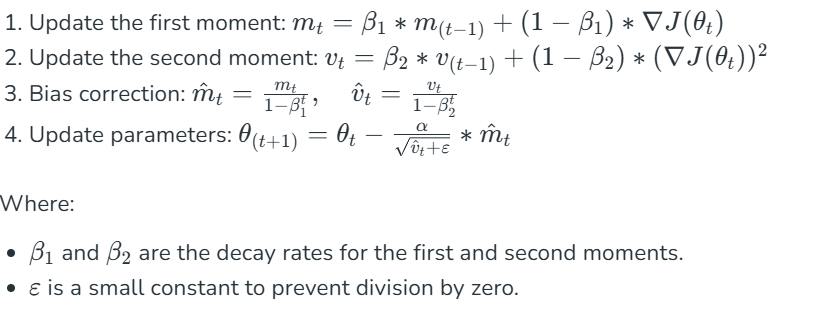

### **AdaDelta**

- Adaptive method that does not require a manually set global learning rate.
  
- Overcomes some limitations of Adagrad.


## **3. Summary Table of Popular Optimizers** 📊

| Optimizer | Key Idea | Pros | Cons |
| --- | --- | --- | --- |
| **GD** | Full batch gradient descent | Stable, consistent | Very slow for large datasets |
| **SGD** | Single/batch example update | Simple, faster | Can be noisy, slow convergence |
| **Momentum** | Adds velocity to updates | Faster, smooth, escapes shallow minima | Slightly more computation |
| **Adagrad** | Adaptive learning rate | Good for sparse data | Learning rate decays too fast |
| **RMSprop** | Adaptive with moving average | Prevents diminishing learning rates | Needs tuning hyperparameters |
| **Adam** | Momentum + RMSprop | Adaptive, fast, robust | Slightly more memory usage |
| **AdaDelta** | Adaptive, no global LR | No manual LR required | Less commonly used |


## **4. Key Takeaways** ✅

- Optimizers directly affect training speed and model performance.
  
- Choosing the right optimizer depends on:
    - Dataset size
    - Model architecture
    - Data sparsity
      
- **SGD**: Simple, effective, but can be slow and noisy.

  
- **Momentum**: Adds “velocity” to accelerate learning and smooth updates.

  
- **Adam**: Combines momentum and adaptive learning rate, widely used for deep learning tasks.

  
- Adaptive optimizers (**Adam, RMSprop, Adagrad**) are generally preferred for complex networks.



## **5. Training Flow with Optimizers**

1. Compute loss using predictions and true labels.
   
3. Calculate gradients (partial derivatives of loss w.r.t parameters).

   
5. Optimizer updates weights and biases based on gradients and learning rate.

   
7. Repeat until the loss is minimized and model converges.

---

In [16]:
import numpy as np
import matplotlib.pyplot as plt


- numpy → for math operations and arrays.

- matplotlib.pyplot → to plot the optimizer paths.

In [17]:
def loss(x):
    return x**2

def grad(x):
    return 2 * x


- loss(x) → the function we want to minimize, here f(x) - x^2
- grad(x) → the derivative of the function, used to know which direction to move.

In [18]:
lr = 0.1           # learning rate
momentum_factor = 0.9
beta1 = 0.9        # for Adam
beta2 = 0.999
epsilon = 1e-8
steps = 30


- lr → how big each step is when updating parameters.

- momentum_factor → weight of previous updates for Momentum optimizer.

- beta1 & beta2 → decay rates for Adam optimizer.

- epsilon → small number to avoid division by zero in Adam.

- steps → total number of iterations for updating x.

In [19]:
x_sgd = 5
x_momentum = 5
x_adam = 5


- All optimizers start at x = 5.

- The goal is to reach x = 0 (minimum of f(x)).

In [20]:
v = 0    # velocity for Momentum
m = 0    # first moment estimate for Adam
v_adam = 0  # second moment estimate for Adam


- v → keeps track of past updates for Momentum.

- m → moving average of past gradients for Adam.

- v_adam → moving average of squared gradients for Adam.

In [21]:
sgd_path = [x_sgd]
momentum_path = [x_momentum]
adam_path = [x_adam]


- These lists will store x values at each step for plotting.

In [22]:
for t in range(1, steps+1):
    # --- SGD ---
    x_sgd -= lr * grad(x_sgd)
    sgd_path.append(x_sgd)
    
    # --- Momentum ---
    v = momentum_factor * v - lr * grad(x_momentum)
    x_momentum += v
    momentum_path.append(x_momentum)
    
    # --- Adam ---
    g = grad(x_adam)
    m = beta1 * m + (1 - beta1) * g
    v_adam = beta2 * v_adam + (1 - beta2) * g**2
    m_hat = m / (1 - beta1**t)
    v_hat = v_adam / (1 - beta2**t)
    x_adam -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
    adam_path.append(x_adam)

- Loop for 30 iterations to update x.

- Move x opposite to the gradient by step size lr.

- Append updated x to sgd_path for plotting.

- v = momentum_factor * v - lr * grad → adds “momentum” from previous step.

- x_momentum += v → update x with this smoothed velocity.

- Momentum helps move faster and reduce oscillations.

- g = grad(x_adam) → current gradient.

- m → moving average of gradients (like momentum).

- v_adam → moving average of squared gradients (adaptive learning rate).

- m_hat & v_hat → bias-corrected estimates to adjust for initial steps.

- x_adam -= ... → update x using adaptive step size.

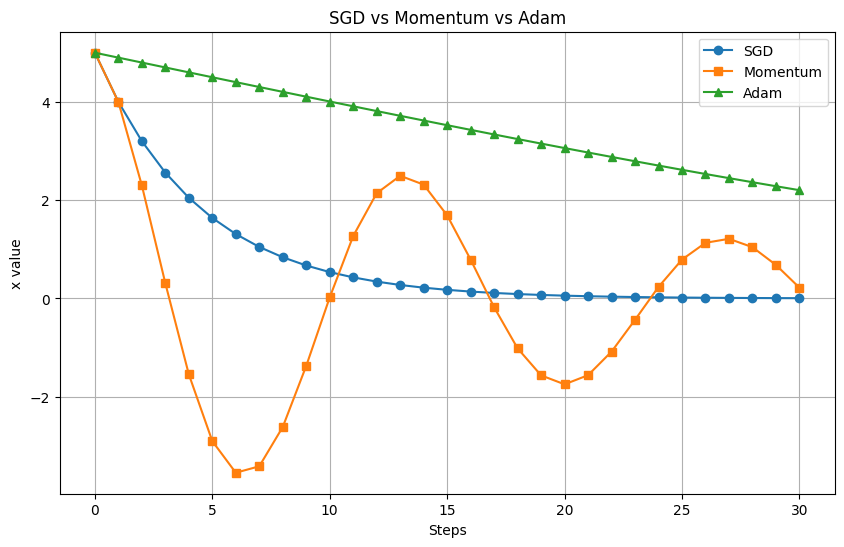

In [23]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(sgd_path, label="SGD", marker='o')
plt.plot(momentum_path, label="Momentum", marker='s')
plt.plot(adam_path, label="Adam", marker='^')
plt.title("SGD vs Momentum vs Adam")
plt.xlabel("Steps")
plt.ylabel("x value")
plt.grid(True)
plt.legend()
plt.show()

- Plots x values over iterations for each optimizer.

- Shows how fast and smooth each optimizer reaches the minimum:

    - SGD: step-by-step, can wobble.

    - Momentum: smoother, faster.

    - Adam: fastest, adaptive step sizes.
 
---

Training with SGD...
Epoch 1/5
375/375 - 4s - 10ms/step - accuracy: 0.6442 - loss: 1.3934 - val_accuracy: 0.8455 - val_loss: 0.7132
Epoch 2/5
375/375 - 2s - 6ms/step - accuracy: 0.8564 - loss: 0.5792 - val_accuracy: 0.8842 - val_loss: 0.4481
Epoch 3/5
375/375 - 2s - 6ms/step - accuracy: 0.8826 - loss: 0.4347 - val_accuracy: 0.8976 - val_loss: 0.3758
Epoch 4/5
375/375 - 2s - 6ms/step - accuracy: 0.8939 - loss: 0.3796 - val_accuracy: 0.9043 - val_loss: 0.3404
Epoch 5/5
375/375 - 2s - 6ms/step - accuracy: 0.9020 - loss: 0.3485 - val_accuracy: 0.9100 - val_loss: 0.3162
Test Accuracy (SGD): 90.97%

Training with Momentum...
Epoch 1/5
375/375 - 4s - 10ms/step - accuracy: 0.8435 - loss: 0.5568 - val_accuracy: 0.9226 - val_loss: 0.2679
Epoch 2/5
375/375 - 2s - 6ms/step - accuracy: 0.9301 - loss: 0.2397 - val_accuracy: 0.9417 - val_loss: 0.1983
Epoch 3/5
375/375 - 2s - 6ms/step - accuracy: 0.9479 - loss: 0.1816 - val_accuracy: 0.9511 - val_loss: 0.1686
Epoch 4/5
375/375 - 2s - 6ms/step - accura

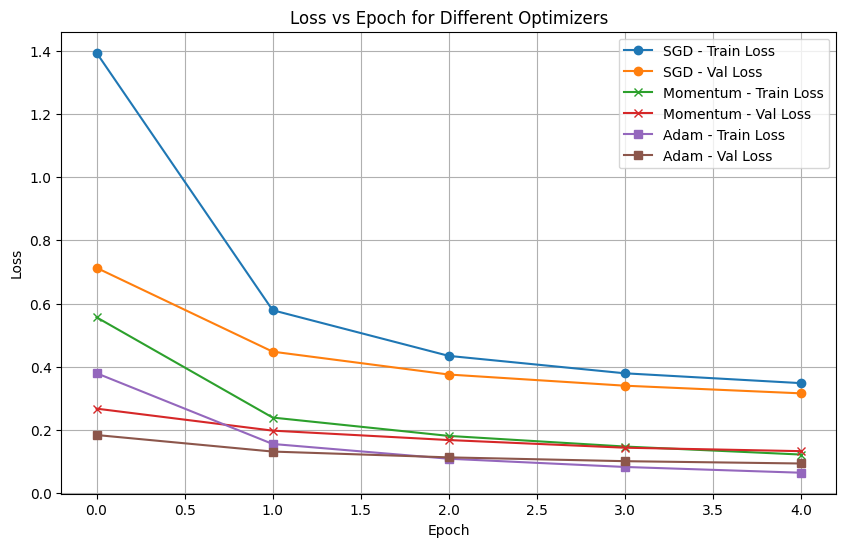

In [32]:
# 🧠 Simple MLP Optimizers Example on MNIST

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0  # normalize pixel values

# Function to create a simple MLP
def create_mlp(activation=None):
    model = Sequential([
        Flatten(input_shape=(28,28)),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    return model

# ----------------------------
# 1️⃣ MLP with SGD
# ----------------------------
sgd_model = create_mlp(activation='relu')
sgd_model.compile(optimizer=SGD(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("Training with SGD...")
history_sgd = sgd_model.fit(x_train, y_train, epochs=5, batch_size=128, 
                            validation_split=0.2, verbose=2)  # save history
loss_sgd, acc_sgd = sgd_model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy (SGD): {:.2f}%".format(acc_sgd*100))

# ----------------------------
# 2️⃣ MLP with Momentum
# ----------------------------
momentum_model = create_mlp(activation='relu')
momentum_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

print("\nTraining with Momentum...")
history_mom = momentum_model.fit(x_train, y_train, epochs=5, batch_size=128, 
                                 validation_split=0.2, verbose=2)  # save history
loss_mom, acc_mom = momentum_model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy (Momentum): {:.2f}%".format(acc_mom*100))

# ----------------------------
# 3️⃣ MLP with Adam
# ----------------------------
adam_model = create_mlp(activation='relu')
adam_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

print("\nTraining with Adam...")
history_adam = adam_model.fit(x_train, y_train, epochs=5, batch_size=128, 
                              validation_split=0.2, verbose=2)  # save history
loss_adam, acc_adam = adam_model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy (Adam): {:.2f}%".format(acc_adam*100))

# ----------------------------
# Plotting Loss vs Epoch
# ----------------------------
plt.figure(figsize=(10,6))
plt.plot(history_sgd.history['loss'], label='SGD - Train Loss', marker='o')
plt.plot(history_sgd.history['val_loss'], label='SGD - Val Loss', marker='o')
plt.plot(history_mom.history['loss'], label='Momentum - Train Loss', marker='x')
plt.plot(history_mom.history['val_loss'], label='Momentum - Val Loss', marker='x')
plt.plot(history_adam.history['loss'], label='Adam - Train Loss', marker='s')
plt.plot(history_adam.history['val_loss'], label='Adam - Val Loss', marker='s')

plt.title("Loss vs Epoch for Different Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


## Explanation

- Imports TensorFlow, Keras layers, optimizers, and Matplotlib for plotting.

- Loads MNIST dataset and normalizes pixel values to [0,1].

- Defines create_mlp function: Flatten → Dense(128) → Dense(64) → Dense(10 softmax).

- Creates and trains MLP with SGD (learning rate 0.01), prints test accuracy.

- Creates and trains MLP with SGD + Momentum (0.9), prints test accuracy.

- Creates and trains MLP with Adam (learning rate 0.001), prints test accuracy.

- Plots training and validation loss for all three optimizers to compare convergence and stability.

- SGD may converge slower; Momentum is smoother; Adam is fastest and adaptive.

- Note: history must be saved during .fit() to plot losses correctly.

- SGD (Vanilla)
    - Final test accuracy: ~91%
    - Training starts slow; loss decreases gradually.
    - Validation loss is higher than Momentum and Adam.
    - Convergence is slower; struggles a bit to reach very high accuracy in only 5 epochs.
- SGD + Momentum
    - Final test accuracy: ~96%
    - Momentum accelerates convergence; loss drops much faster.
    - Validation loss is significantly lower than vanilla SGD.
    - Convergence is smoother; reduces oscillations, so model learns faster.
- Adam
    - Final test accuracy: ~97.4%
    - Fastest convergence among the three; training and validation loss drop sharply.
    - Adaptive learning rate and momentum combination help reach higher accuracy quickly.
    - Smoothest curve; overfitting is minimal in 5 epochs.

Key Takeaways:

- Vanilla SGD works but is slow.
- Adding Momentum makes training much faster and more stable.
- Adam dominates in both speed and final accuracy due to adaptive updates.
- If you want fast training + high accuracy, Adam is usually the go-to optimizer.
- In practice, Momentum is still great for simpler setups or when you want more control over learning rate schedules.

💡 Quick rule of thumb: SGD < Momentum < Adam in terms of speed & convergence for typical MLPs on MNIST.

---

# 5. **Initialization**

## **1.**  What is Weight Initialization?

- Neural networks learn by adjusting weights via backpropagation.
- Weights are the parameters that control the influence of one neuron on another.
- Biases shift the activation function, but weight values are the main driver of learning.

Why Initialization Matters:

1. Stability of gradients – Poor initialization can lead to exploding or vanishing gradients.
2. Convergence speed – Proper initialization makes networks train faster.
3. Avoiding dead neurons – Some activations (like ReLU) can stop learning if initialized poorly.

> Think of weights as the “starting fuel” for learning. If it’s too little → network dies; too much → network explodes. 💥
> 

## 2.  Problems from Poor Initialization

### 2a. Vanishing Gradients 😵‍💫

- Occurs when gradients shrink to near zero during backpropagation.
- Common with sigmoid or tanh activations.
- Consequence: early layers stop learning, network fails to converge.

### 2b. Exploding Gradients 💥

- Occurs when gradients grow exponentially in deep networks.
- Causes unstable training or NaN losses.

### 2c. Dead Neurons 💀

- Happens mostly with ReLU.
- Neuron outputs 0 for all inputs → never activates.
- Bad initialization can make this happen to many neurons.

Key Idea: Proper initialization keeps variance of activations and gradients stable across layers.4

## 3.  Xavier / Glorot Initialization 🌊

### 3a. Motivation

- Sigmoid and tanh saturate when inputs are too large or small.
- Xavier initialization sets weights to keep variance of activations consistent across layers.

### 3b. Formulas

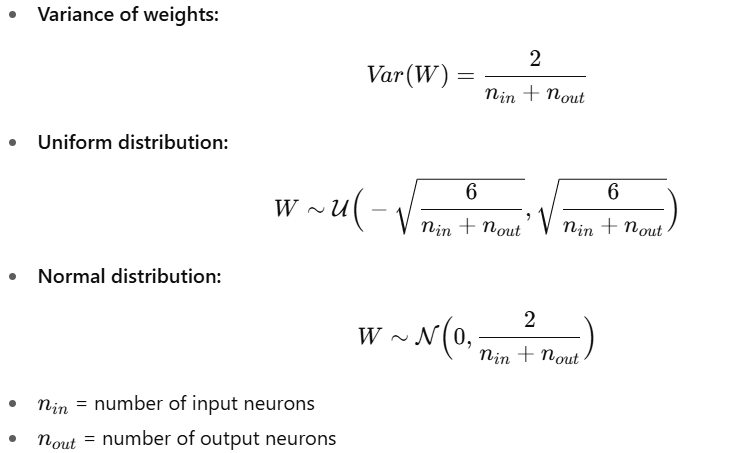

### 3c. When to Use

- Activation function: tanh / sigmoid
- Network depth: shallow to moderately deep
  

In [33]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform

Dense(10, activation='tanh', kernel_initializer=GlorotUniform())


<Dense name=dense_51, built=False>

##  He / Kaiming Initialization 🔥

### **4a. Motivation**

- ReLU activation outputs 0 for negative inputs → halves variance.
- Xavier is not enough for ReLU → gradients shrink → slower training.
- He initialization scales variance higher to account for ReLU’s properties.

### **4b. Formula**

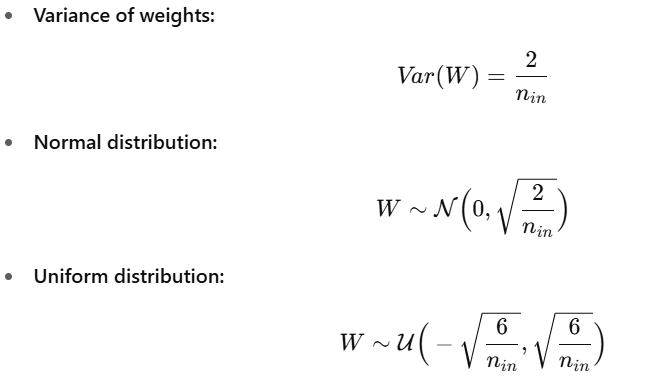

### 4c. When to Use

- Activation function: ReLU, Leaky ReLU, ELU
- Deep networks (>5 layers)
- Helps prevent dead neurons and improves convergence speed.



In [26]:
from tensorflow.keras.initializers import HeNormal

Dense(10, activation='relu', kernel_initializer=HeNormal())


<Dense name=dense_20, built=False>

## 5. Visual Intuition of Signal Flow 🎨

| Initialization | Forward Signal | Backward Gradient | Effect |
| --- | --- | --- | --- |
| Too small weights | Almost 0 | Vanishes | Slow learning  |
| Too large weights | Explodes | Explodes | Unstable training  |
| Xavier | Balanced | Balanced | Stable for tanh/sigmoid  |
| He | Balanced for ReLU | Balanced | Stable & fast for ReLU  |
- Proper initialization ensures gradients neither vanish nor explode.
- Think of it as “fueling your network just right”.


## 6. Practical Tips 🔥

- Sigmoid/Tanh → Xavier
- ReLU → He
- Avoid all-zero initialization → kills learning
- Deep networks → combine He + BatchNorm → very stable
- Always use framework’s built-in initializers (Keras, PyTorch)


## 7. Summary 📝

- Weight initialization = critical for stable and fast training
- Xavier → balances activations for tanh/sigmoid
- He → balances activations for ReLU
- Proper initialization → stable gradients, faster convergence, fewer dead neurons
- Wrong initialization → vanishing/exploding gradients, dead neurons, unstable training

---

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Xavier initialization = GlorotUniform
# He initialization = HeNormal

model = Sequential([
    Dense(64, input_shape=(100,), activation='relu', kernel_initializer='he_normal'),  # He
    Dense(32, activation='tanh', kernel_initializer='glorot_uniform'),                 # Xavier
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,874 (34.66 KB)

 Trainable params: 8,874 (34.66 KB)

 Non-trainable params: 0 (0.00 B)

---

# **6.Batch vs Mini-Batch vs Online (Stochastic) Training**  🏋️

## 1. Batch Training

- Definition:
    - Uses all training data at once to compute the gradient before updating the weights.
      
    - One gradient update per epoch.
      
- How it works:
    1. Forward pass through the whole dataset → compute total loss
       
    3. Backward pass → compute gradients based on all samples
 
       
    5. Update weights once per epoch
       
- Pros ✅:
    - Very stable gradient updates → smooth convergence
      
    - Deterministic (same results each epoch if no randomness)
 
      
- Cons ❌:
    - Slow for large datasets → memory-heavy
      
    - Can get stuck in local minima due to lack of noise in gradient
 
      
- Use case:
    - Small datasets that fit in memory
      
    - When you want very stable, precise gradient updates

---

## 2. Mini-Batch Training

- Definition:
    - Splits the training data into small batches (e.g., 32, 64, 128 samples)
      
    - Weight updates occur after each mini-batch
 
      
- How it works:
    1. Split dataset into batches
       
    3. For each batch: forward pass → compute loss → backward pass → update weights
 
       
    5. Repeat for all batches → 1 epoch
 
       
- Pros ✅:
    - Faster convergence than full batch (smaller updates more frequent)
      
    - Reduces memory usage (doesn’t need full dataset at once)
 
      
    - Gradient has some noise → can escape local minima → better generalization
 
      
- Cons ❌:
    - Slightly less stable than full-batch updates
      
    - Choice of batch size can affect performance (too small → noisy, too large → slower)
 
      
- Use case:
    - Large datasets
      
    - Most deep learning training uses mini-batches (standard practice)


---

## 3. Online / Stochastic Training

- Definition:
    - Updates weights after every single sample
      
    - Extreme case of mini-batch (batch size = 1)
 
      
- How it works:
    1. Take one training sample → forward pass → compute loss → backward pass → update weights
       
    3. Repeat for all samples
 
       
- Pros ✅:
    - Very fast per update
      
    - Can escape local minima more easily due to noisy updates
 
      
    - Can start training immediately, even with streaming data
 
      
- Cons ❌:
    - Very noisy → loss may fluctuate a lot
      
    - Slower convergence to exact minimum (hard to stabilize)
 
      
    - Less efficient on GPU due to small parallel workload
 
      
- Use case:
    - Streaming or online learning scenarios
      
    - When dataset is extremely large or continuously updated


## ⚖️ Comparison Table

| Feature | Batch | Mini-Batch | Online/Stochastic |
| --- | --- | --- | --- |
| Gradient Update | Once per epoch | After each mini-batch | After each sample |
| Memory Usage | High | Medium | Low |
| Convergence | Stable, slow | Balanced, fast | Noisy, fast per step |
| Generalization | Moderate | Good | Good due to noise |
| Typical Batch Size | All data | 32–256 | 1 |

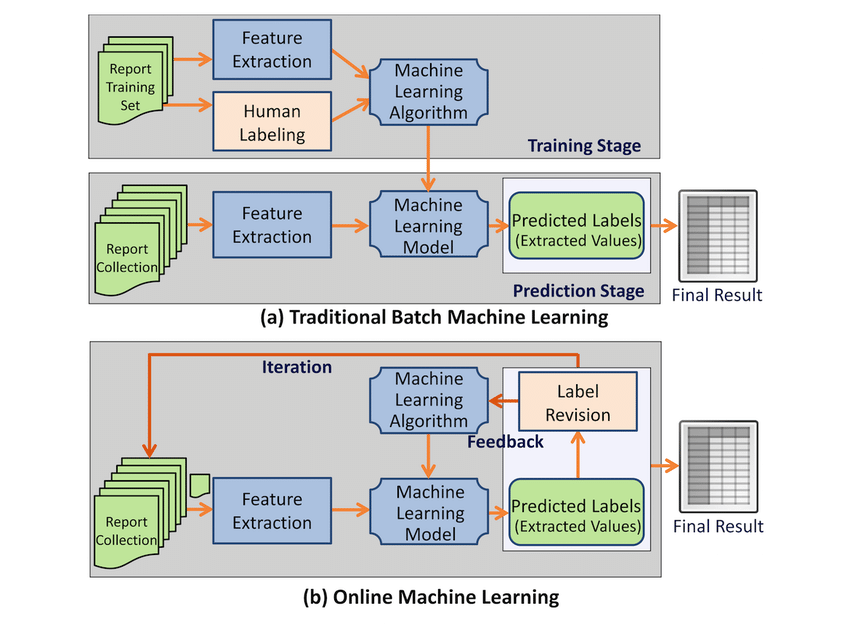

## **Batch Learning**

### ✅ **Advantages:** 

- **High Accuracy:** Can produce highly accurate models because it analyzes the entire dataset.
  
- **Stability:** Once trained, models remain unchanged until the next retraining.

  
- **Simplicity:** Easier to implement and manage; does not require constant updates.

### ❌ **Limitations:**

- **Resource Intensive:** Requires significant memory and computational resources for large datasets.
  
- **Slow Adaptation:** Cannot quickly adapt to new data; retraining from scratch is needed.

  
- **Latency:** Long intervals between model updates make it unsuitable for real-time applications.


## **Online Learning**

### ✅ **Advantages:**

- **Efficiency:** Requires fewer resources in certain phases; suitable for big data or streaming data.
  
- **Adaptability:** Can be quickly updated with new data, making it ideal for fast-changing environments.

  
- **Real-Time Performance:** Can provide results with minimal delay, allowing quick reaction to changes.

### ❌ **Limitations:**

- **Complexity:** Harder to implement and manage due to constantly changing objectives or business conditions.
  
- **Accuracy Variability:** Can overfit noisy or non-stationary data if not carefully handled.

  
- **Data Dependency:** Model performance depends on a continuous flow of fresh data.


### **Conclusion**

- **Batch Learning:** Best for fixed datasets where high accuracy and model stability are priorities.
  
- **Online Learning:** Ideal for dynamic environments with continuously produced data requiring timely responses.

  
- **Considerations:** Choice depends on data nature, available computational resources, and need for model recalibration.

  
- **Key Insight:** Understanding both approaches allows practitioners to leverage their strengths effectively in machine learning projects.

---

# **Math**

## **1. Forward pass equation:**



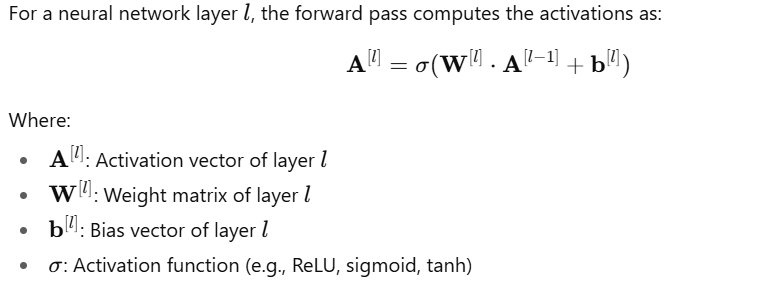

Forward propagation is the process where input data passes through the network to generate an output. Here's how it works:

- **Input Layer**: The input data is fed into the network. Each feature in the input dataset corresponds to a neuron in this layer.
  
- **Hidden Layers**: The input moves through one or more hidden layers. Each neuron computes a weighted sum of inputs and applies an activation
function to introduce non-linearity.


- **Output Layer**: The final layer generates the output. The activation function of this layer depends on the type of problem:
    - **Softmax** for multi-class classification
    - **Sigmoid** for binary classification
    - **Linear** for regression tasks
      
- **Prediction**: The network produces an output based on current weights and biases. The loss function evaluates the error by comparing predicted output with actual values.

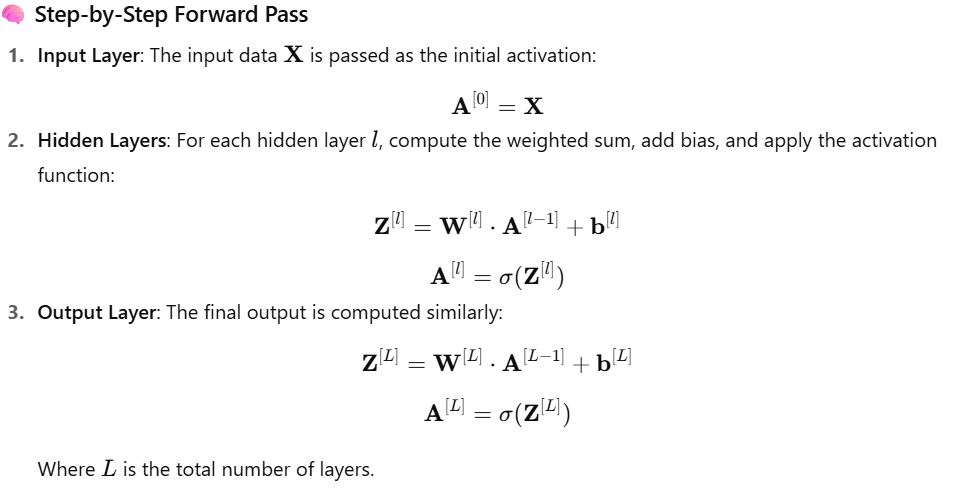

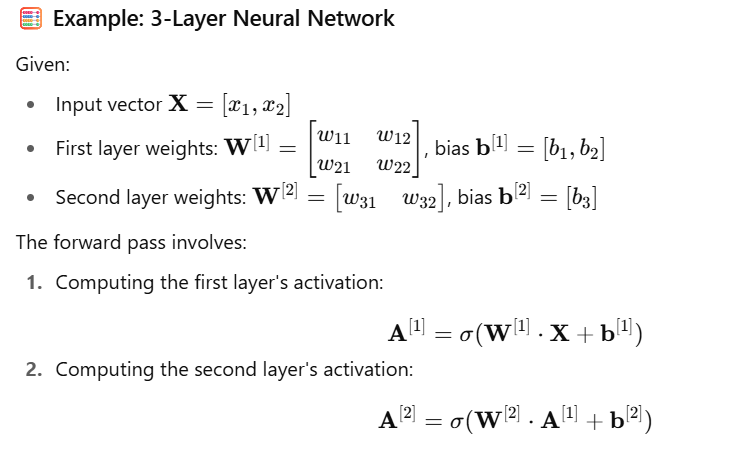

## 🔍 Key Points

- Layer-wise Computation: Each layer's output depends on the previous layer's activations.
- Activation Functions: Introduce non-linearity, enabling the network to learn complex patterns.
- Importance: Forward propagation is essential for making predictions and is the basis for backpropagation during training.

---

## **2. Backpropagation step-by-step:**

## 🔄 Backpropagation in Neural Networks

Backpropagation is the core algorithm for training neural networks. It updates weights and biases to minimize the error between predicted output and actual output. Think of it as the network “learning from its mistakes.”

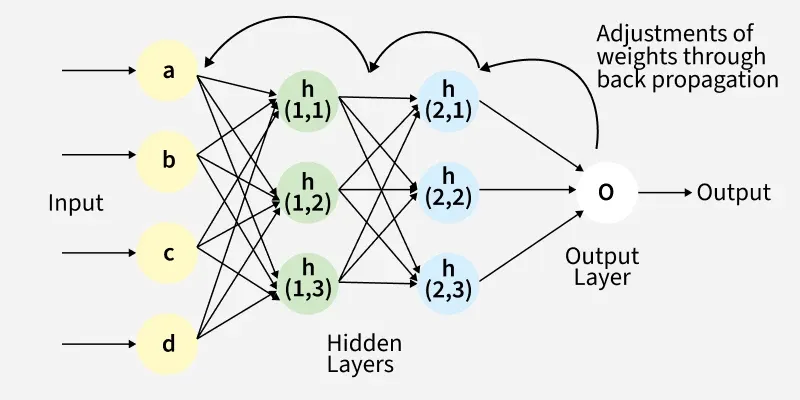

### Step 1: Forward Pass

- Input data X is fed into the network.
- Each neuron computes:
  
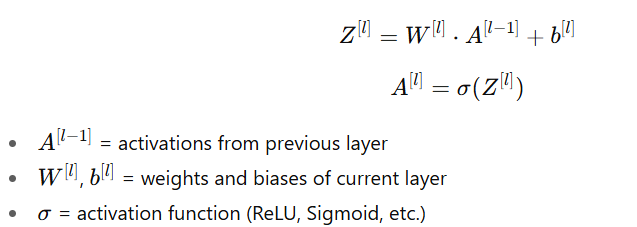

- Output layer produces predicted values Y^
- Loss function calculates error:
  
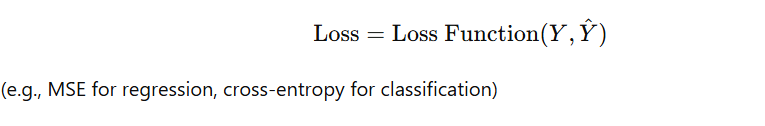

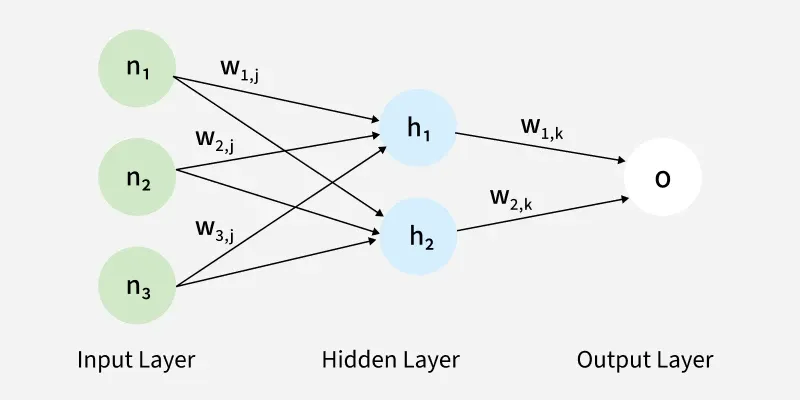

### Step 2: Backward Pass

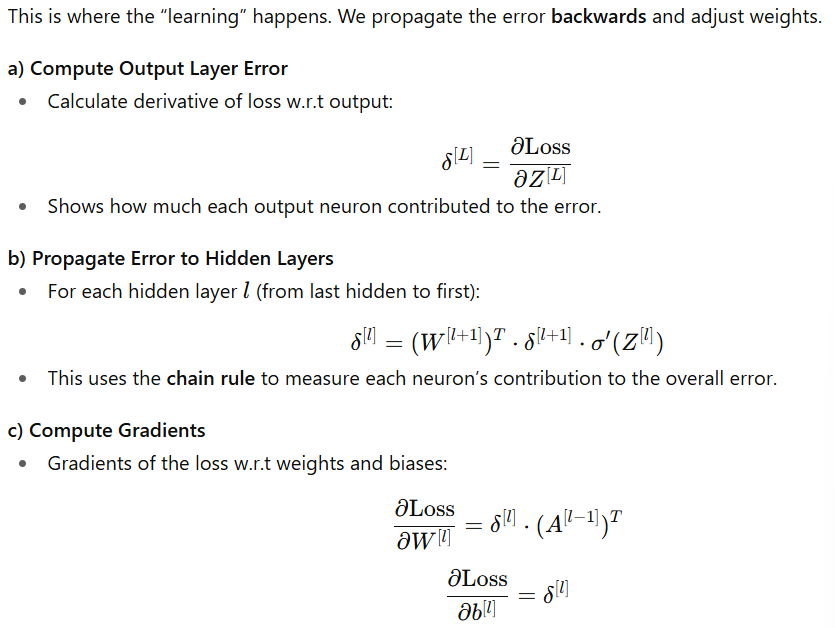

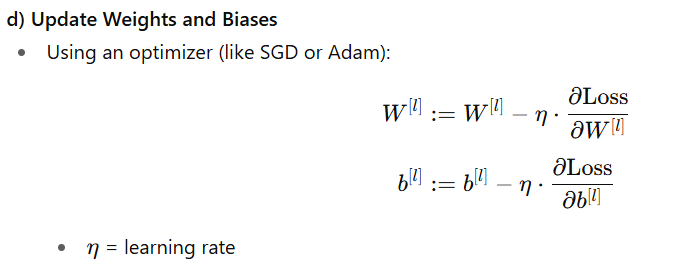

### Step 3: Repeat

- Repeat forward and backward passes for multiple epochs until the network converges (loss is minimized).

### Key Insights

- Backpropagation is just gradient descent applied layer by layer.
  
- Activation function derivative (σ′) is crucial; without it, gradients cannot flow.

  
- Helps network learn complex patterns efficiently by updating weights intelligently.

  
- Works best with differentiable activation functions.

---

## 3. 🔑 Cross-Entropy Loss Derivation for Softmax (Explained Simply)

### 1. What Softmax Does

Softmax takes the raw outputs (called logits) from the last layer of a neural network and converts them into probabilities. It squashes the values so that:

- Every output lies between 0 and 1.
- All outputs add up to 1.

So, if you’re classifying digits 0–9, softmax tells you the probability that the image is each digit. Example: “This is 70% likely to be a 3, 20% a 5, 10% a 7.”

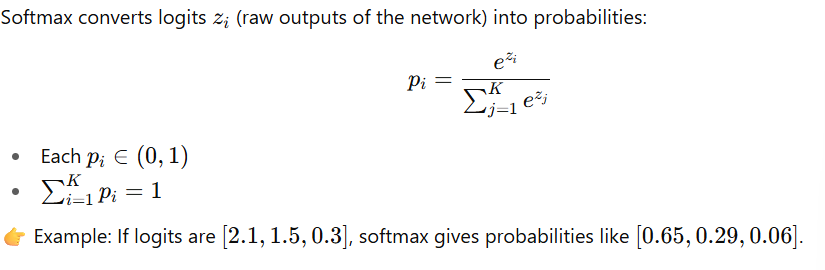

### 2. What Cross-Entropy Does

Cross-entropy measures how far the predicted probability distribution (from softmax) is from the actual correct label.

- If the model assigns high probability to the correct class → low loss.
- If it assigns low probability to the correct class → high loss.

Think of it as a “penalty score” for how wrong your probabilities are.

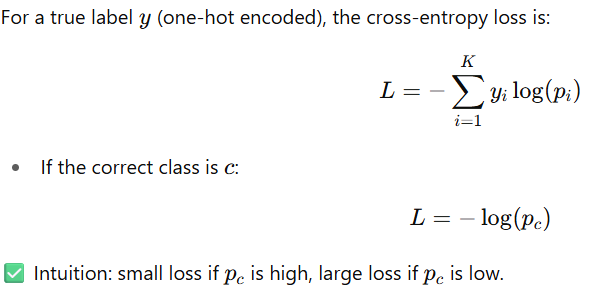

### 3. The Problem With Derivatives

When training, we need gradients (slopes) to update the weights.

The derivative of softmax on its own is messy, because every output depends on *all* the logits (not just one). Changing one logit affects all the probabilities. That makes the math complicated.


### 4. The Magic Simplification

Here’s the beauty: when you combine softmax with cross-entropy, the messy derivatives collapse into something very simple.

Instead of carrying around a complicated formula, the gradient with respect to each output is just:

👉 Predicted probability minus the actual label

So if the network said “70% chance of 3” but the true label is 100% “3”, the gradient is 0.7 – 1 = –0.3. That negative value tells the network to increase the probability for “3” next time.


### 🚀 5. Why This Matters

- Training becomes computationally efficient.
- We avoid numerical instability (no exploding/vanishing values).
- Backpropagation is easier: the network just adjusts weights based on “what it predicted” vs “what it should have predicted.”


### ✅ Key Takeaways

- Softmax turns raw scores into probabilities.
- Cross-entropy penalizes incorrect predictions.
- When combined, their derivative simplifies beautifully to: “prediction minus truth.”
- This simplicity is why nearly every modern classification model uses softmax + cross-entropy together.

---

#  4. Why ReLU is preferred (Avoids Vanishing Gradients)🔥


## 📌 Vanishing Gradient Problem (The Core Issue)

- In deep neural networks, activation functions like Sigmoid and Tanh can cause gradients to become extremely small (close to zero).
- This happens because:
    - Sigmoid compresses inputs into (0, 1). Its derivative maxes at 0.25 and gets much smaller for extreme values.
    - Tanh compresses inputs into (−1, 1). Its derivative maxes at 1, but shrinks near extremes.
- During backpropagation, gradients are multiplied layer by layer.
    - If each layer contributes a value < 1, the gradient shrinks exponentially.
    - Early layers stop learning → training stalls.
- This is known as the Vanishing Gradient Problem.

❗Impact: networks can’t learn deep representations, training becomes slow or fails.

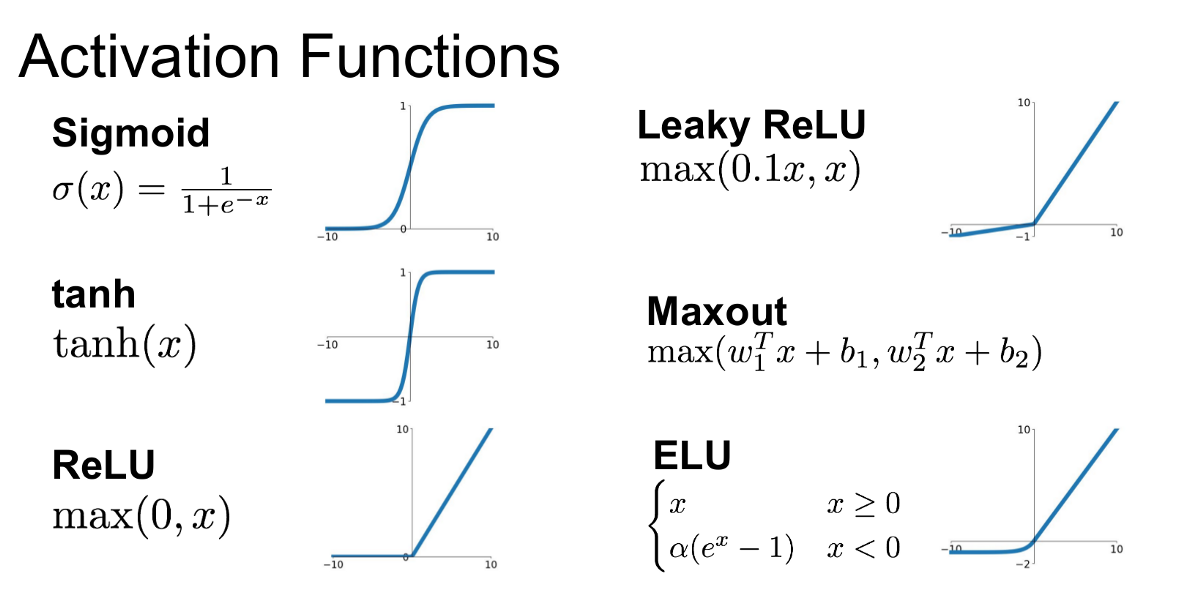

### 1. ReLU’s Game-Changer Simplicity⚡

- Definition: Rectified Linear Unit (ReLU) → f(x) = max(0, x)
- How it works:
    - If x ≤ 0 → output = 0
    - If x > 0 → output = x
- Derivative:
    - 0 for x ≤ 0
    - 1 for x > 0
- ✨ Benefit: For positive inputs, gradients remain strong (derivative = 1).
- This prevents gradients from shrinking to near zero during backpropagation.

### 2. Why ReLU Stops Vanishing Gradients⚡

- In deep networks, positive activations retain gradient strength (1 instead of <0.25 like sigmoid).
- This ensures gradients flow backward through many layers without shrinking.
- As a result, deeper models can be trained effectively.
- Practical outcome:
    - Faster convergence during training.
    - Better feature learning in very deep models (CNNs, RNNs, Transformers).

### 3. Extra Perks of ReLU⚡

- Sparsity:
    - Neurons output 0 when input ≤ 0 → leads to sparse activations.
    - Sparsity = fewer active neurons → better efficiency and interpretability.
- Computation Efficiency:
    - Unlike sigmoid/tanh (which use exponentials), ReLU is just max(0,x) → super fast.
- Better generalization:
    - Sparse activations often reduce overfitting by forcing compact representations.


### 4. The Trade-Off → Dying ReLUs Problem⚡

- Issue:
    - If weights push neurons into negative input regions permanently, outputs are always 0.
    - Derivative = 0 → those neurons stop updating during backprop.
    - Such neurons are considered “dead.”
- Impact:
    - Loss of model capacity (fewer active neurons).
    - Can happen if learning rate is too high.
- Solutions:
    - Leaky ReLU: allows a small slope (e.g., 0.01x) for x < 0.
    - PReLU: learnable slope for negative inputs.
    - ELU: smooth function, avoids sharp cut-off at 0.


## 🧠  Sigmoid/Tanh vs ReLU

| Feature | Sigmoid/Tanh | ReLU |
| --- | --- | --- |
| **Gradient Behavior** | Tends to vanish | Derivative = 1 (for x>0) |
| **Deep Networks** | Training stalls | Deep layers learn fine |
| **Computation** | Expensive (exponentials) | Cheap (max(0, x)) |
| **Sparsity** | Dense activations | Sparse & efficient |
| **Risk** | Saturation → vanishing gradient | Dying neurons (0 output) |



## 🤯 Why ReLU Dominates Modern Deep Learning

- Solves vanishing gradient problem (for positive values).
  
- Encourages sparse, efficient representations.

  
- Fast to compute, speeds up training.

  
- Works very well in practice → CNNs, ResNets, Transformers all rely heavily on ReLU or its variants.

  
- Even when Residual Connections help with vanishing gradients, ReLU still remains the default.


## 🛠 If ReLU Goes Wrong → Fixes

- Leaky ReLU → small slope for negatives (keeps gradient alive).
  
- PReLU → learn slope automatically.

## ✅ Final Takeaway:

ReLU is the standard activation in deep learning because it avoids vanishing gradients, speeds up computation, and supports sparse representations. Its one weakness (dying neurons) is well-managed by ReLU variants.

---

#  5. Optimization Update Methods (SGD, Momentum, Adam)⚡

## 🟢 1. Stochastic Gradient Descent (SGD)

- What it does: Updates model parameters by moving them in the opposite direction of the gradient (slope) of the loss function.
- How it works:
    - After every batch of training data, it looks at the slope and nudges the weights a little to reduce error.
    - The “learning rate” controls how big each nudge is.
- Intuition: Like walking downhill step by step, always choosing the steepest direction.
- Pros: Simple, efficient for large datasets.
- Cons: Can zigzag in narrow valleys and converge slowly.

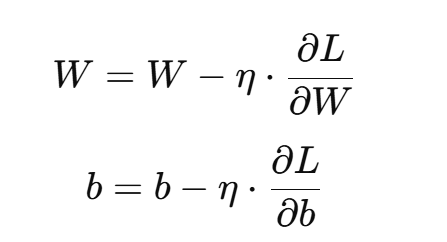

## 🟡 2. SGD with Momentum

- Problem with plain SGD: It often gets stuck or oscillates too much, especially in deep networks.
- Momentum fix: Adds a “memory” of past updates (like velocity). Instead of only looking at the current slope, it also considers the direction it was already moving.
- Intuition: Like rolling a ball downhill — once it starts moving, it builds speed and doesn’t get stuck easily in small bumps.
- Effect:
    - Smoother, faster convergence.
    - Reduces oscillations.
- Pros: Much faster than plain SGD in practice.
- Cons: Needs tuning of the momentum factor.

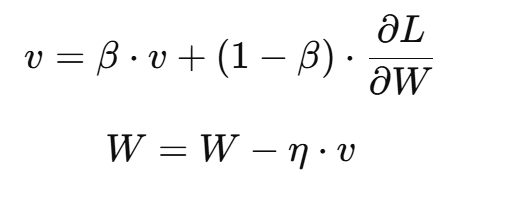


## 🔵 3. Adam (Adaptive Moment Estimation)

- Problem with Momentum: Still uses the same learning rate for all parameters.
- Adam fix:
    - Combines momentum (remembers direction of past gradients) with adaptive learning rates (scales updates differently for each parameter).
    - Keeps track of both the average gradient and the average squared gradient → helps balance speed and stability.
- Intuition: Like having a smart GPS for optimization: remembers where you’ve been (momentum) and adjusts step size automatically depending on the terrain (adaptive scaling).
- Effect:
    - Faster convergence.
    - Works well on noisy, sparse, or complex problems.
- Pros: Default choice in deep learning, very efficient.
- Cons: Can sometimes overfit or not generalize as well as plain SGD.

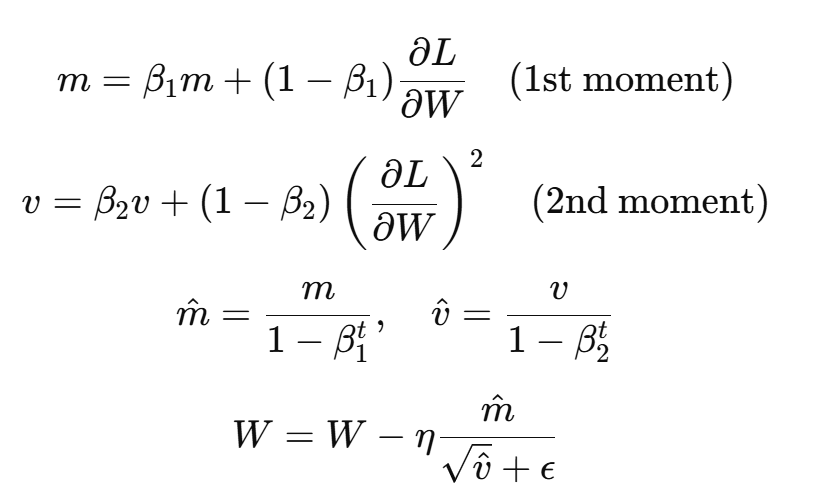

## 🧠 Quick Comparison

| Method | Key Idea | Pros | Cons |
| --- | --- | --- | --- |
| **SGD** | Step in direction of gradient | Simple, efficient | Slow, zigzags |
| **Momentum** | Adds memory of past steps | Faster, smoother | Needs tuning |
| **Adam** | Combines momentum + adaptive scaling | Adaptive, widely used | More complex, risk of overfitting |


✅ Final Takeaway

- Use SGD for simplicity and baselines.
- Use Momentum when you want faster training with fewer oscillations.